# Finalterm project

## By Afrizal I. Yafi' and Fajri Ahmad N.

<br> <br>

### Ref:

* https://youtu.be/PUMMCLrVn8A

---

In [ ]:
# Install lib yang digunakan
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-jggu52t0
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-jggu52t0
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit c3b216c3cb8593513a018eb3ec4fd6f18d3aba5b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev39+gc3b216c-py3-none-any.whl size=73725 sha256=92ed44b1425f9338e29b4fa9abdad273030b23e117ad83952804654d8cfd19d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-9f3m77sn/wheels/05/e9/f7/57056e7c7e44b1feed932fa49fdec9d706c4f563e37160ab74
Successfully built snscrape


In [ ]:
import pandas as pd  # Mengimpor library pandas dan memberikan alias pd.
from tqdm.notebook import tqdm  # Mengimpor fungsi tqdm dari library tqdm.notebook. Fungsi tqdm digunakan untuk menampilkan progress bar pada saat mengambil data tweet.
import snscrape.modules.twitter as sntwitter  # Mengimpor modul Twitter dari library snscrape dan memberikan alias sntwitter. Modul ini digunakan untuk mengambil data tweet dari Twitter.
import networkx as nx  # Mengimpor library NetworkX dan memberikan alias nx. Library NetworkX digunakan untuk membangun graf untuk melakukan analisis jaringan.
import matplotlib.pyplot as plt  # Mengimpor library pyplot dari library Matplotlib dan memberikan alias plt. Library Matplotlib digunakan untuk membuat visualisasi grafik.
import warnings  # Mengimpor library warnings.
warnings.filterwarnings('ignore')  # Mengaktifkan mode peringatan 'ignore' pada library warnings, yang akan menonaktifkan semua peringatan yang akan dikeluarkan oleh Python.

In [ ]:
# Membuat list untuk menyimpan data
listTweets = []

# Menentukan jumlah maksimum tweet yang akan dicrawl
nTweets = 1500

# Menggunakan snscrape untuk crawling data dan menambahkan tweet ke list
for i, tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper('#Coachella min_faves:1000 min_retweets:100 lang:en -filter:replies').get_items()), total=nTweets + 1):
    if i > nTweets:  # Jika i melebihi nTweets, maka keluar dari loop
        break
    # Menambahkan tweet ke dalam listTweets dengan mengambil informasi yang diperlukan
    listTweets.append([tweet.date, tweet.id, tweet.likeCount, tweet.user.username, tweet.content])

# Membuat dataframe dari list
twtDataFrame = pd.DataFrame(listTweets, columns=['Date Created', 'Tweet ID', 'Number of Likes', 'Username', 'Tweet'])

# Menyimpan dataframe dalam bentuk csv
twtDataFrame.to_csv("getDataCoachella.csv", index=False)


  0%|          | 0/1501 [00:00<?, ?it/s]

In [ ]:
twtDataFrame.dtypes

Date Created       datetime64[ns, UTC]
Tweet ID                         int64
Number of Likes                  int64
Username                        object
Tweet                           object
dtype: object

In [ ]:
twtDataFrame.head(5)

,Date Created,Tweet ID,Number of Likes,Username,Tweet
0,2023-06-09 09:00:27+00:00,1667094292295467008,7387,ygent_official,#BLACKPINK ‘B.P.M.’ Roll #22\n\n▶️https://t.co...
1,2023-06-02 09:01:32+00:00,1664557852034486274,21206,BLACKPINK,#BLACKPINK ‘B.P.M.’ Roll #21\n\n🎬https://t.co/...
2,2023-05-27 04:00:38+00:00,1662307802323488774,30990,BLACKPINK,#BLACKPINK ‘Typa Girl’ Live at Coachella 2023\...
3,2023-05-27 04:00:20+00:00,1662307726847016960,26675,BLACKPINK,#BLACKPINK ‘Shut Down’ Live at Coachella 2023\...
4,2023-04-28 12:01:33+00:00,1651919579327905793,130187,BLACKPINK,BLACKPINK COACHELLA WEEK 2 BEHIND PHOTO\n \n#B...


In [ ]:
import re

twtDataFrame['Tweet'] = twtDataFrame['Tweet'].astype(str) # mengubah semua data di kolom 'Tweet (Text)' menjadi string

def clean_string(text):
    # Mengubah setiap kata menjadi lowercase
    text = text.lower()

    # Menghapus Karakter Selain Huruf a-z dan A-Z
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Mengganti baris Baru Dengan Spasi
    text = re.sub("\n", " ", text)

    # Menghapus Karakter Berulang
    text = re.sub(r'(\w)(\1{2,})', r"\1", text)

    # Menghapus kata yang memiliki 1 sampai 2 huruf (untuk menghilangkan kata kata "a, it, so, in, an")
    text = re.sub(r'\W*\b\w{1,2}\b', " ", text)

    # Menghapus spasi yang lebih dari satu
    text = re.sub('(s{2,})', ' ', text)

    # Menghapus kata "https"
    text = text.replace("https", "")

    # Menggabungkan semua kata
    text = ' '.join(text.split())

    return text

twtDataFrame['Tweet'] = twtDataFrame['Tweet'].apply(clean_string)


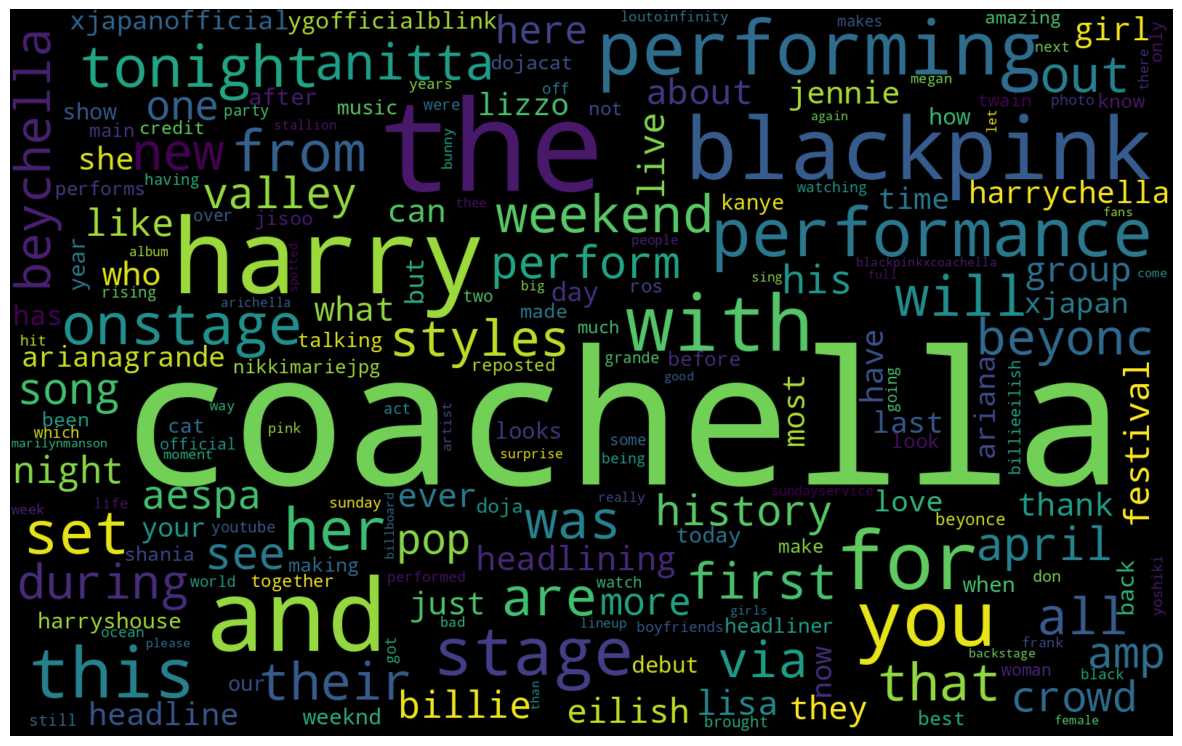

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

word = {}

# Hitung setiap kata
for i in range(len(twtDataFrame)):
    text = twtDataFrame.loc[i]['Tweet']
    text = text.split(' ')
    text = list(set(text))

    for j in range(len(text)):
      try:
        word[text[j]] += 1
      except:
        word[text[j]] = 1

wordcloud = WordCloud(width=1600, height=1000, max_font_size=256, background_color='black').generate_from_frequencies(word)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
selectCol = twtDataFrame[['Username', 'Tweet ID']]
edges = pd.DataFrame(selectCol)
edges

,Username,Tweet ID
0,ygent_official,1667094292295467008
1,BLACKPINK,1664557852034486274
2,BLACKPINK,1662307802323488774
3,BLACKPINK,1662307726847016960
4,BLACKPINK,1651919579327905793
...,...,...
1496,PopCrave,985249295845789697
1497,ccrstrna,985248827836805121
1498,PopCrave,985244474916982786
1499,PopCrave,985244036289220608


First Community: (['1124871531148877824', '1250589878934368256', '1250590163429814272', '1612989988211392512', '1667094292295467008', 'ygent_official'], ['1612989461314564098', '1648295358701928450', '1648657700212068354', '1649608975145648128', '1651194418966278144', '1651919579327905793', '1662307726847016960', '1662307802323488774', '1664557852034486274', 'BLACKPINK'], ['1080684130914963456', '1080694081276313601', '1080699182036463616', '1080953169457356801', '1081340604498542592', '1084955947980767232', '1092857351907016704', '1114884163302297600', '1116732971237683200', '1116835896647663616', '1117058868742381568', '1117064901535703040', '1117431046163894277', '1117450977085468673', '1117641672710598656', '1117696586371481605', '1117833412935598080', '1120094867764461568', '1120096030899560448', '1306581953236303874', '1381691480738254854', '1399784922504646659', '1422168558314967042', '1511015638751485966', '1511318665244950533', '1515107782256644104', '1515250181658316807', '15

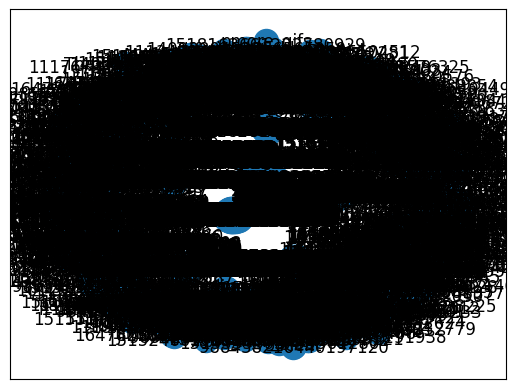

In [ ]:
_GRAPH = nx.Graph()
selectCol = selectCol.astype(str)
edges = selectCol.values.tolist()
_GRAPH.add_edges_from(edges)
communities = nx.community.girvan_newman(_GRAPH)
first_community = tuple(sorted(c) for c in next(communities))
print("First Community:", first_community)

# Draw the graph
pos = nx.spring_layout(_GRAPH)
nx.draw_networkx(_GRAPH, pos, with_labels=True)
plt.show()

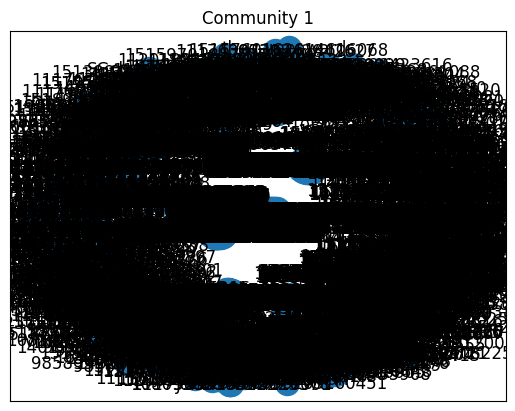

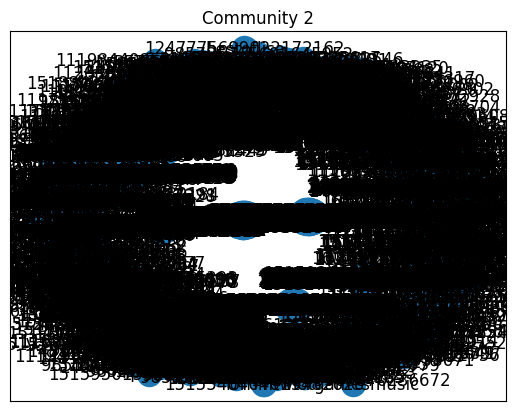

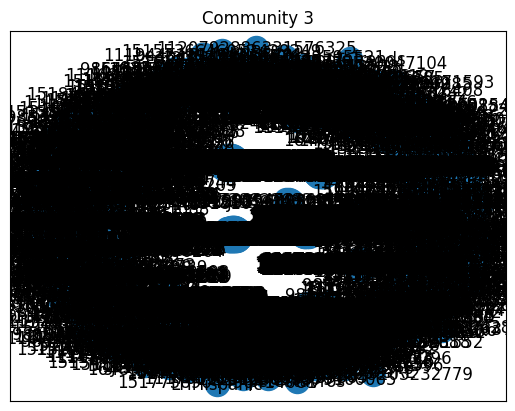

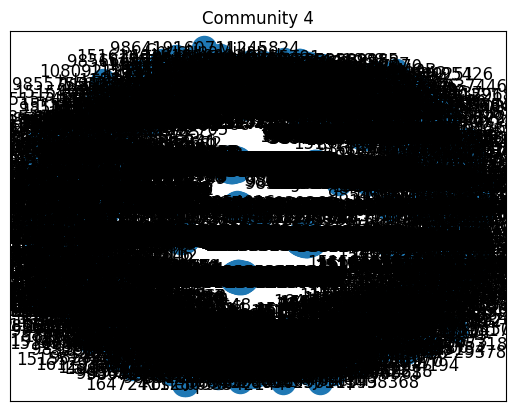

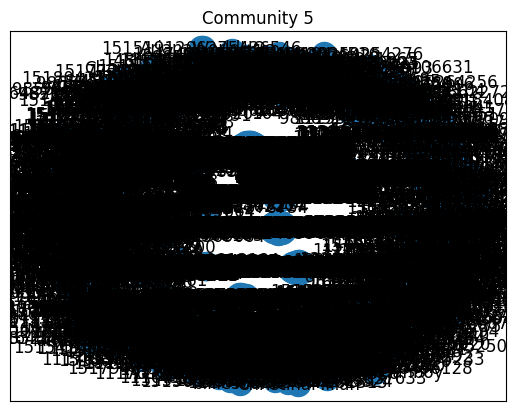

In [ ]:
# Perform Girvan-Newman community detection
communities_generator = nx.community.girvan_newman(_GRAPH)

# Specify the maximum number of communities to detect
max_communities = 5  # Adjust as needed

# Iterate until the desired number of communities is reached
for i, communities in enumerate(communities_generator):
    if i == max_communities:
        break

    # Create a subgraph for each community
    subgraphs = []
    for community in communities:
        subgraph = _GRAPH.subgraph(community)
        subgraphs.append(subgraph)

    # Draw the subgraphs
    plt.figure(i + 1)
    plt.title(f"Community {i + 1}")
    pos = nx.spring_layout(_GRAPH)
    for subgraph in subgraphs:
        nx.draw_networkx(subgraph, pos, with_labels=True)

plt.show()